<a href="https://colab.research.google.com/github/Aisha3O/A-project/blob/main/customer_segmentation(k_means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection & analysis

In [23]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [24]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
#rows & col num
customer_data.shape

(200, 5)

In [26]:
customer_data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [27]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Choosing anual income colomn and spending score colomn

---



In [28]:
X = customer_data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [29]:
#choosing the number of clusters using WCSS/Elbow Method (For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.)
#finding WCSS for different number of clusters

WCSS = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)


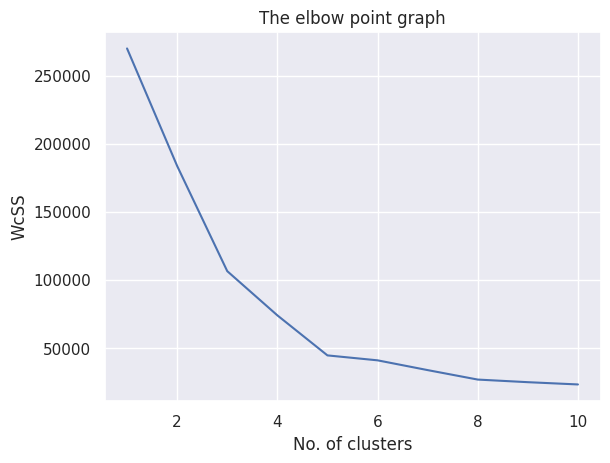

In [30]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11), WCSS)
plt.title('The elbow point graph')
plt.xlabel('No. of clusters')
plt.ylabel('WcSS')
plt.show()

optimum number of clusters= 5
training the kmeans clustering model

In [31]:
kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)

#return a label for each datapoint of each cluster

Y = kmeans.fit_predict(X)
print(Y)

[3 4 7 4 3 4 7 4 7 4 7 4 7 4 7 4 3 4 3 4 3 4 7 4 7 4 3 4 3 4 7 4 7 4 7 4 7
 4 3 4 3 4 3 6 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 0 6 6 0 6 0 6 6 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 9 2 1 2 9 2 9 2 1 0 1 2 1 0 9
 2 1 2 1 2 9 2 1 2 9 2 9 2 1 2 1 2 9 2 1 2 9 2 9 2 1 2 9 2 9 2 9 8 9 8 9 8
 1 8 9 8 9 8 9 8 5 8 5 8 5 8 5]


vusualizing all the clusters

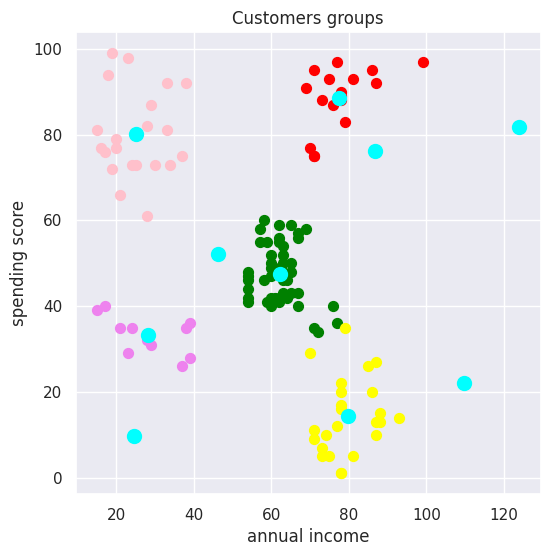

In [34]:
#ploting all clusters & centroid
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='CLuster 1') #X[Y==0,0] (X-axis values all the Cluster no 0, first row"annual income")
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='CLuster 2') # X[Y==0,1] (Y-axis values all the Cluster no 0, 2nd row"spending score")
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='CLuster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='CLuster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='pink', label='CLuster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroid')#X-axis value of centroid in first line , in 2nd y axis value

plt.title('Customers groups')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()